# CUSTOMER CHURN ANALYSIS


# Overview

SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service.

This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.

# Problem statement

SyriaTel is facing the challenge of customer churn, which directly impacts its revenue and market share. The company recognizes the need for a proactive approach to identify and retain customers who are likely to discontinue their services in the near future.To address this, the objective is to create a reliable predictive model that accurately anticipates customer churn based on historical data and behavioral patterns.

# Objectives

**Main objective**  
The primary goal is to develop a binary classification model that accurately predicts whether a customer is likely to churn ("soon") or not. 

**Other objectives**  
Explore and utilize historical customer data to identify patterns and behaviors indicative of potential churn.  
Evaluate and compare the performance of various classification algorithms to select the most effective model for SyriaTel's specific context.  
Turn Data Results into Practical Advice for SyriaTel:Translate the computer results into practical advice that SyriaTel can use.

# Data sourcing

In [26]:
#importing important libraries
import pandas as pd
import numpy as np
#for visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings ("ignore")

#Modeling-used libraries
from sklearn.model_selection  import train_test_split, cross_val_score 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve, auc
# Algorithms for supervised learning methods 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv("dataset/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data understanding

**Summary of Features in the Dataset**

state: The state the customer lives in  
account length: he number of days the customer has had an account  
area code: The area code of the customer  
phone number: The phone number of the customer  
international plan: True if the customer has the international plan, otherwise false  
voice mail plan: True if the customer has the voice mail plan, otherwise false  
number vmail messages: The number of voicemails the customer has sent  
total day minutes: Total number of minutes the customer has been in calls during the day  
total day calls: Total number of calls the user has done during the day  
total day charge: Total amount of money the customer was charged by the Telecom company for calls during the day  
total eve minutes: Total number of minutes the customer has been in calls during the evening   
total eve calls:The total number of calls the customer has done during the evening    
total eve charge:The total amount of money the customer was charged by the Telecom company for calls during the evening    
total night minutes:The total number of minutes the customer has been in calls during the night  
total night calls:The total number of calls the customer has done during the night  
total night charge:The total amount of money the customer was charged by the Telecom company for calls during the night  
total intl minutes:The total number of minutes the user has been in international calls  
total intl calls:The total number of international calls the customer has done  
total intl charge:The total amount of money the customer was charged by the Telecom company for international calls  
customer service calls:The number of calls the customer has made to customer service  
churn: it is true if the customer terminated their contract, otherwise false  

In [3]:
df.shape

(3333, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#print("churn:", df["churn"].value_counts(normalize=True), "\n")
#print("phone number:", df["phone number"].value_counts(normalize=True), "\n")
#print("International plan:", df["International plan"].value_counts(normalize=True), "\n")
#print("voice mail plan:", df["voice mail plan"].value_counts(normalize=True), "\n")

**Data cleaning**

Handle missing values

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in our data


In [7]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [8]:
# Remove customer phone number feature it is contact information on the client and adds no value to the analysis
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Explanatory Data Analysis

I) **UNIVARIATE ANALYSIS**

a) **Analysis on the target variable "churn"**

<function matplotlib.pyplot.show(close=None, block=None)>

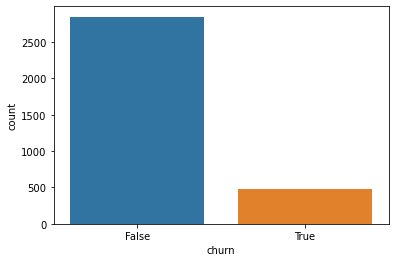

In [9]:
sns.countplot(x = "churn", data = df)
plt.show

In [10]:
df["churn"].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Out of all 3,333 customers 14.5% churn but others remain to be loyal

b) **Analysis for numeric features**

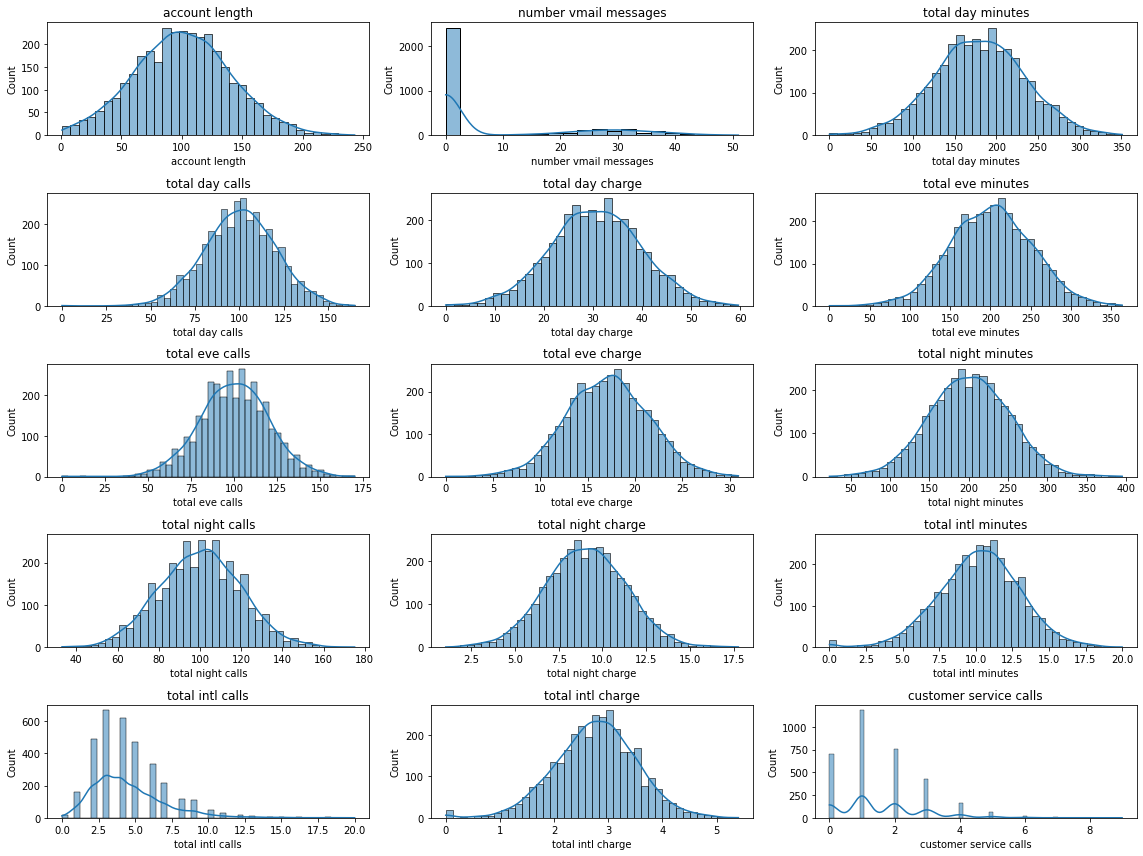

In [11]:
numeric_columns = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

# Plotting histograms for numerical variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()  
plt.show()

As we can see, most of the features above follow a normal distribution apart from customer service calls  which has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

c) **Analysis for categorical  features**

**Converting categorical data to numerical data**

In [12]:
#starting with the "state" column
import hashlib
# Function to hash encode categories
def hash_encode_category(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % 6  
# Apply hash encoding to the 'state' column
df['state'] = df['state'].apply(hash_encode_category)

# Display the result
print(df.head(5))

   state  account length  area code international plan voice mail plan  \
0      5             128        415                 no             yes   
1      0             107        415                 no             yes   
2      3             137        415                 no              no   
3      0              84        408                yes              no   
4      2              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder =  LabelEncoder()
df['churn']= label_encoder.fit_transform(df['churn'])
df['international plan']= label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] =label_encoder.fit_transform(df['voice mail plan'] )
df.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,5,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,2,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


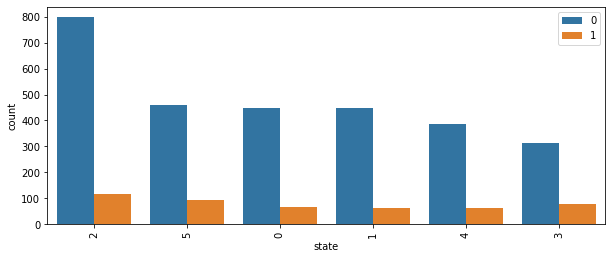

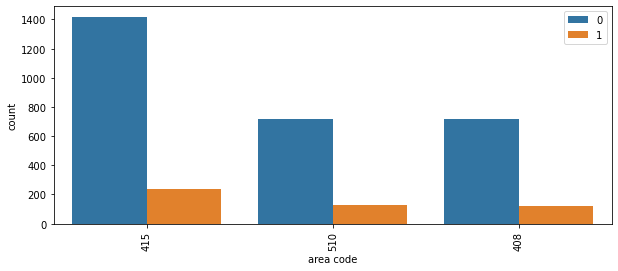

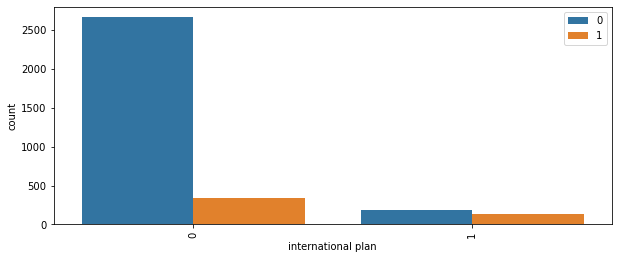

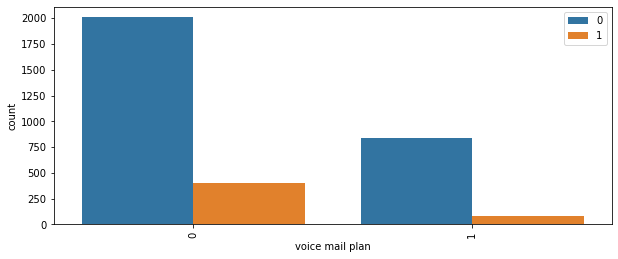

In [14]:
category_columns = ['state','area code','international plan','voice mail plan']
for i in category_columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()
#where 0 represent customer not churning and 1 representing that customer has churned.   

2) **MULTIVARIATE ANALYSIS**

**Correlation Heatmap for Numeric Features**

[Text(0.5, 1.0, 'correlation matrix of numeric features')]

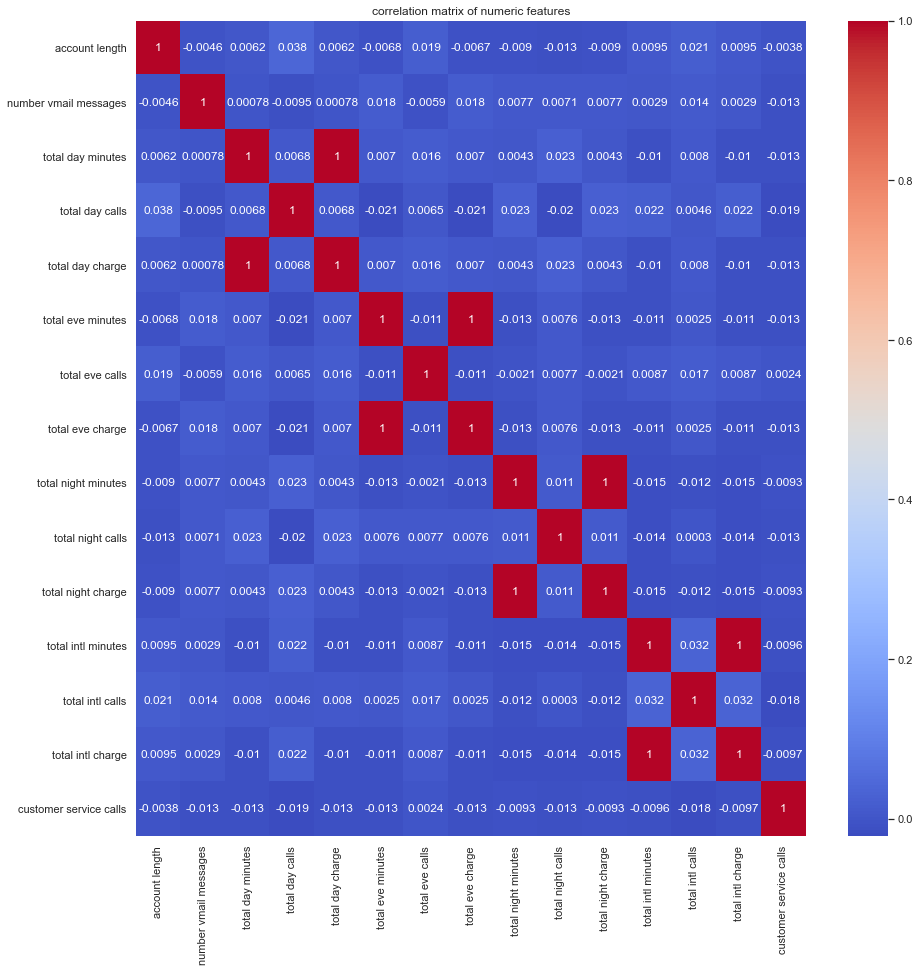

In [15]:

corr_matrix = df[numeric_columns].corr()#(#method='spearman') # calculate correlation matrice

plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm').set(title='correlation matrix of numeric features')


# Modeling

In [16]:
#Defining our target and independent variables
X = df.drop(columns=["churn"], axis = 1)
y = df["churn"]
#Create a training and test set using train_test_split() (set random_state=42 for reproducability)
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size = 0.2, random_state=42) 

**Scaling**

In [17]:
#Scaling was done after splitting the data to avoid potential data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Baseline model**

# Logistic Regression Classifier

Logistic regression in this project has been used as a baseline model for its simple algorithm and to act as a benchmark for the complex models that have been used later on in this project.It is also well-suited for binary classification problems, where the target variable has two classes and in this case is our prediction is focused on whether a customer has churned (1) or not (0).

In [18]:
#instantiate LogisticRegression() 
logreg = LogisticRegression()
#Fitting the model on the training data
logreg.fit(X_train_scaled,y_train)
y_pred_logr = logreg.predict(X_test_scaled)

#checking for evaluation metrics

print('Accuracy_score: \n',"{}" .format(accuracy_score(y_test, y_pred_logr)))
print('Classification report for logistic regression: \n')
print('{}'.format(classification_report(y_test, y_pred_logr)))
print('Confusion Matrix:\n ', '{}'.format(confusion_matrix(y_test, y_pred_logr)))


Accuracy_score: 
 0.8515742128935532
Classification report for logistic regression: 

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.53      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.70      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667

Confusion Matrix:
  [[551  15]
 [ 84  17]]


results

# Random Forest classifier

Random Forest is an ensemble method that can handle complex relationships in the data and is less prone to overfitting which makes it a ver good model to train and fit our data.Although interpretability might reduce at this point

In [23]:
random_forest = RandomForestClassifier(random_state = 42)#instantiate
random_forest.fit(X_train_scaled,y_train)#fitting the data
y_pred_rf = random_forest.predict(X_test_scaled)#getting predictions

#checking for evaluation metrics
print('Accuracy_score: \n',"{}" .format(accuracy_score(y_test, y_pred_rf)))
print('Classification report for Random Forest classifier: \n')
print('{}'.format(classification_report(y_test, y_pred_rf)))
print('Confusion Matrix:\n ', '{}'.format(confusion_matrix(y_test, y_pred_rf)))

Accuracy_score: 
 0.9505247376311844
Classification report for Random Forest classifier: 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.72      0.82       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
  [[561   5]
 [ 28  73]]


Evidently, a Random Forest classifier is the way to go since it has proven itself by increasing the accuracy score from 85.2% as per our baseline model to 95% meaning that 95% of the predictions were true.Precision, Recall, and F1-Score for both classes have improved, indicating a better balance between correctly identifying instances of class 1 and avoiding false positives.
The model excels in predicting class 0, with very high precision and recall.


In [ ]:
xgb = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
xgb.fit(X_train_scaled,y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

#Checking for evaluation metrics
print('Accuracy_score: \n',"{}" .format(accuracy_score(y_test, y_pred_xgb)))
print('Classification report for XGBClassifier: \n')
print('{}'.format(classification_report(y_test, y_pred_xgb)))
print('Confusion Matrix:\n ', '{}'.format(confusion_matrix(y_test, y_pred_xgb)))


**Hyperparameter tuning for Random Forest Classifier**

In [24]:
# Create a pipeline with a Random Forest classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to search
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Apply Grid Search
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Get predicted probabilities for class 1
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]

# Set a custom threshold (example threshold = 0.4)
custom_threshold_rf = 0.4
y_pred_custom_rf = (y_pred_prob_rf > custom_threshold_rf).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom_rf = accuracy_score(y_test, y_pred_custom_rf)
classification_report_custom_rf = classification_report(y_test, y_pred_custom_rf)

# Print results
print("Custom Threshold Accuracy (Random Forest):", accuracy_custom_rf)
print("Classification Report with Custom Threshold (Random Forest):\n", classification_report_custom_rf)

Custom Threshold Accuracy (Random Forest): 0.9610194902548725
Classification Report with Custom Threshold (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       566
           1       0.90      0.83      0.87       101

    accuracy                           0.96       667
   macro avg       0.94      0.91      0.92       667
weighted avg       0.96      0.96      0.96       667



The first hyper parameter tuning in Random Forest  led to an accuracy of 94.75% which led to me setting a custom threshold for optimization of the model and for sure it  ha impacted this model and yielded an accuracy of 96%.This shows that this model can 96% accurately predict ou of all instances.

# XGBoost 

XGBoost is known for its overall  high performance and efficiency. It is optimized for speed and can handle large datasets efficiently, making it suitable for projects with substantial amounts of data.

In [25]:
xgb = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
xgb.fit(X_train_scaled,y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

#Checking for evaluation metrics
print('Accuracy_score: \n',"{}" .format(accuracy_score(y_test, y_pred_xgb)))
print('Classification report for XGBClassifier: \n')
print('{}'.format(classification_report(y_test, y_pred_xgb)))
print('Confusion Matrix:\n ', '{}'.format(confusion_matrix(y_test, y_pred_xgb)))


Accuracy_score: 
 0.9505247376311844
Classification report for XGBClassifier: 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.72      0.82       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

Confusion Matrix:
  [[561   5]
 [ 28  73]]


An accuracy score of 95% is pretty good but it did not perform better compared our Random Forest Classifier that used tuned hyper parameters.

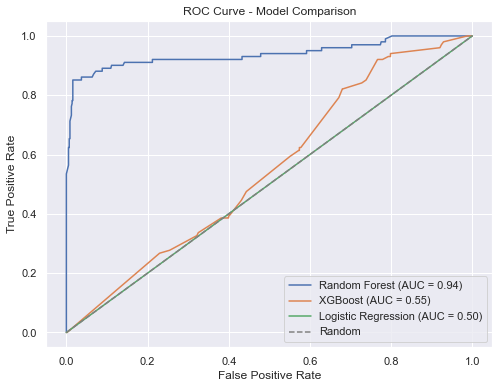

In [28]:
# Make predictions
rf_probs = best_model_rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
lr_probs = logreg.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Plot the 45-degree line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend()

# Show the plot
plt.show()

The best perfoming curve is the one left upper most side that shows the highest true positive rate against the false positive rate.This clearly shows the best perfoming model to predict whether a customer will churn or not is the Random Forest Classifier .

# 

# Results